### Midterm exam 2023
Name-Lastname: Ulugbek Shernazarov
<br>Student ID: st125457

### Problems
Use Python libraries to analyze the following PM2.5 datasets in order to determine factors that contribute to variations of PM2.5. Scores will be given based on the following issues. (100 pts)
- Import data (10%)
- Explore and prepare data (15%)
- Use appropriate methods to clean data (20%))
- Use appropriate methods to analyze data (15%)
- Use suitable visualization methods to clean, explore and analyze data (25%)
- Summary of the analysis (10%)
- Assocate the AQI index with your analysis (5%)

-To jusify results. You can create addition cells to explain or comments.


### The following dataset is the measurement of the PM2.5 and related environmental parameter. (This datasett is not a pubic dataset and students are required to use this dataset only for the midterm exam of CPDSAI).)

Data dictionary of the PM2.5 datset collected from the weater station near Police station, Chokechai 4, Bankok.

- __Timestame__: the timestamp of the measurement.
- __CO__ : measurement of Carbon monoxide at 3 meter height in ppm (parts per million)
- __NO__ : measurement of Nitrix Oxide at 3 meter height in ppb (parts per billion)
- __NO2__ : measurement of Nitrogen dioxide at 3 meter height in ppb (parts per billion)
- __NOX__ : measurement of the Oxide of Nitrogen dioxide at 3 meter height in ppb (parts per billion)
- __PM10__ : measurement of the microscopic matter, less than 10 µm (micro-meter) in diameter, suspended in air or water at 3 meter height in μg/m3 (microgram per cubic meters)
- __PM2.5__ : measurement of the microscopic matter, less than 2.5 µm (micro-meter) in diameter, suspended in air or water at 3 meter height in μg/m3 (microgram per cubic meters)
- __Wind speed__ : measurement of the wind speed at 10 meter height in m/s (meter per second)
- __Wind dir__ : measurement of the wind direction at 10 meter height in degree
- __Temp__ : measurement of the termperature at 2 meter height in degree Celcius
- __Rel hum__ : measurement of the relative humidity at 2 meter height in percent
- __Pressure__ : measurement of the atmospheric pressure at 2 meter height in mmHg (millimetre of mercury)
- __Rain__ : measurement of the rainfall at 3 meter height in millimeter
__HINT__: To create PM2.5 prediction model, use PM2.5 column as Target (Label)
#### Additional Iinformation
US air quality index (AQI) is categorized into 6 levels ranging from 0 to more than 301 (average for 24 hours). Color of each level characterizes the impact on health. https://www.iqair.com/th/newsroom/what-is-aqi
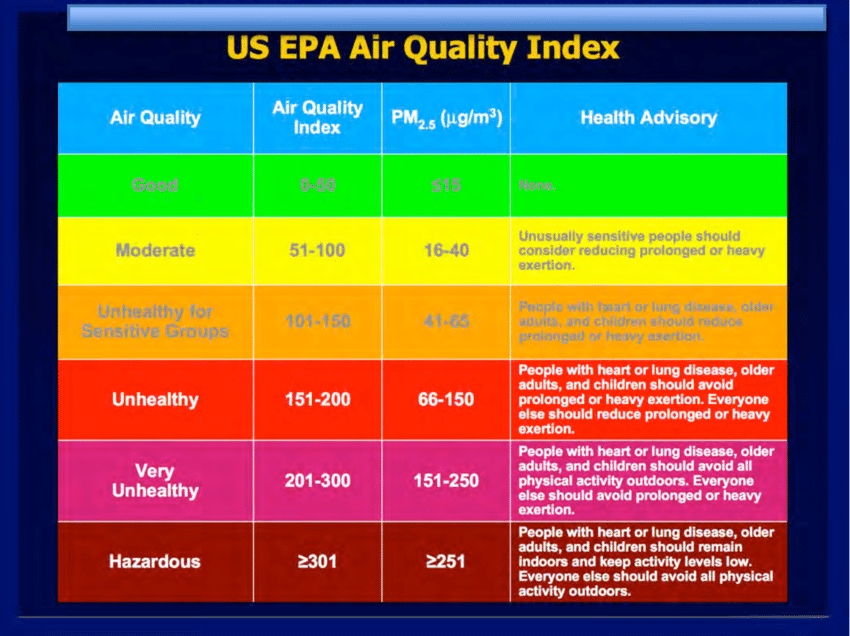

### programing hint

You can use **pandas.DataFrame.resample** method for frequency conversion and resampling of time series. The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or the caller must pass the label of a datetime-like series/index to the on/level keyword parameter. The syntax of the method is as follows.

**DataFrame.resample(rule, closed=None, label=None, convention='start', on=None, level=None, origin='start_day')**

**Parameters:



*   **rule**: DateOffset, Timedelta or str
The offset string or object representing target conversion e.g. 'H', 'D', 'W', 'M'.
*   **closed**: {‘right’, ‘left’}, default None Which side of bin interval is closed. The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’.
*   **label**:{‘right’, ‘left’}, default None
Which bin edge label to label bucket with. The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’.
*   **convention**:{‘start’, ‘end’, ‘s’, ‘e’}, default ‘start’
For PeriodIndex only, controls whether to use the start or end of rule.

*   **on**: str, optional
For a DataFrame, column to use instead of index for resampling. Column must be datetime-like.


*   **origin**: Timestamp or str, default ‘start_day’
The timestamp on which to adjust the grouping. The timezone of origin must match the timezone of the index. If string, must be one of the following:

The following example show how to downsample the series with 9 one minutes timestamps into 3 minute bins and sum the values of the timestamps falling into a bin.

__ex.__<br>
series = pd.Series(range(9), index=pd.date_range('1/1/2000', periods=9, freq='T'))

series.resample('3T').sum()

The picture below shows possible rules we can use in resample method.
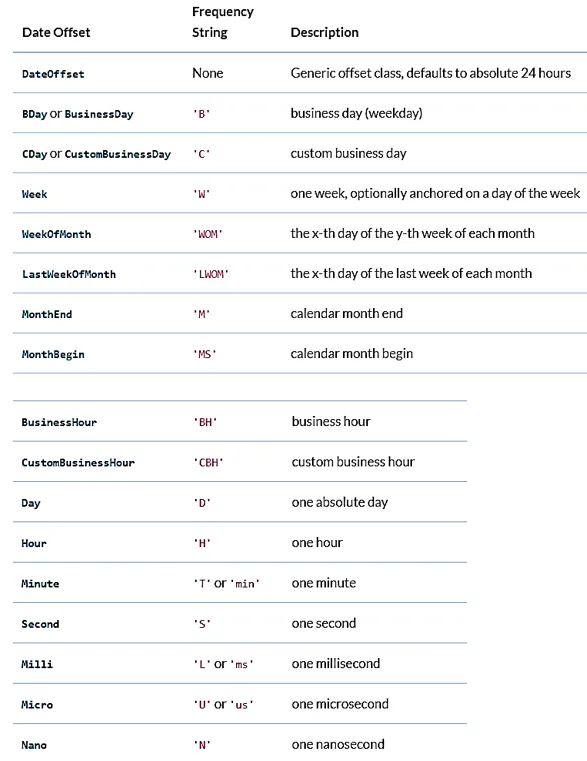


### import libs

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta, datetime

### Part I: Import data (10%)
Read data from https://chantri-bucket.s3.amazonaws.com/53t_PM2.5_65_lower_half.csv and put them into the df dataframe with proper delimitter.


In [183]:
#Write your code here
lower_filename = '53t_PM2.5_65_lower_half.csv'
upper_filename = '53t_PM2.5_65_upper_half.csv'

df_lower = pd.read_csv(lower_filename, delimiter=';')
df_upper = pd.read_csv(upper_filename, delimiter=';')

df = pd.concat((df_lower, df_upper))

# df.head()
df_lower.shape, df_upper.shape, df.shape

((1848, 13), (1847, 13), (3695, 13))

### Part II: Data exploration (10%)

Please provide the findings or information that you discover from this dataset.

###### Summary of findings you discover


1.   The data has missing values, missing labels (in our case is pm2.5 - 20 rows), duplicated values (24 rows) and our label column is object - need to change into numeric.
2.   'PM2.5	0.449237	0.375961	0.632312	0.489749	0.933188	1.000000	-0.325314	-0.184051	-0.151716	-0.235145	0.513765	-0.049413' 
3.   List item
4.   List item


Can be more or less than 4

In [184]:
df.shape

(3695, 13)

In [185]:
df.columns

Index(['Timestamp', 'CO', ' NO ', ' NO2', ' NOX', 'PM10', 'PM2.5',
       ' Wind speed', ' Wind dir', ' Temp', ' Rel hum', ' Pressure', ' Rain'],
      dtype='object')

In [186]:
#Write code to show your findings
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3695 entries, 0 to 1846
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    3695 non-null   object 
 1   CO           3495 non-null   float64
 2    NO          3517 non-null   float64
 3    NO2         3517 non-null   float64
 4    NOX         3518 non-null   float64
 5   PM10         3695 non-null   object 
 6   PM2.5        3695 non-null   object 
 7    Wind speed  3694 non-null   float64
 8    Wind dir    3694 non-null   float64
 9    Temp        3692 non-null   float64
 10   Rel hum     3681 non-null   float64
 11   Pressure    3687 non-null   float64
 12   Rain        3651 non-null   float64
dtypes: float64(10), object(3)
memory usage: 404.1+ KB


In [187]:
df.describe()

,CO,NO,NO2,NOX,Wind speed,Wind dir,Temp,Rel hum,Pressure,Rain
count,3495.000000,3517.000000,3517.000000,3518.000000,3694.000000,3694.000000,3692.000000,3681.000000,3687.000000,3651.000000
mean,0.833133,41.715951,32.020472,71.336271,0.466378,152.090146,28.856907,60.685140,757.437754,0.115530
std,0.475910,43.140981,17.939385,54.232435,0.396206,88.954792,2.850301,14.738261,2.419931,1.369294
min,0.000000,0.000000,6.000000,7.000000,0.000000,0.000000,18.700000,26.000000,750.000000,0.000000
25%,0.485000,10.000000,18.000000,30.000000,0.200000,80.000000,27.000000,49.000000,756.000000,0.000000
50%,0.770000,25.000000,28.000000,53.000000,0.300000,115.000000,28.700000,60.000000,758.000000,0.000000
75%,1.090000,60.000000,43.000000,98.000000,0.600000,246.000000,30.800000,71.000000,759.000000,0.000000
max,3.270000,253.000000,120.000000,307.000000,2.700000,360.000000,36.500000,95.000000,768.000000,48.400000


In [188]:
# Number of duplicated rows
df.duplicated().sum()

24

In [189]:
# Lets see from which it is duplicated
df[df.duplicated(keep=False)]

# After running it is clear that the rows from 743-766 are duplicated to 767-790

,Timestamp,CO,NO,NO2,NOX,PM10,PM2.5,Wind speed,Wind dir,Temp,Rel hum,Pressure,Rain
743,2019-09-01 00:00:00,0.21,7.0,16.0,22.0,23,4,0.3,22.0,27.7,76.0,755.0,0.0
744,2019-09-01 01:00:00,0.34,5.0,15.0,20.0,28,6,0.3,43.0,27.5,75.0,755.0,0.0
745,2019-09-01 02:00:00,0.37,8.0,18.0,27.0,24,6,0.5,44.0,27.3,75.0,755.0,0.0
746,2019-09-01 03:00:00,0.30,3.0,14.0,17.0,27,7,0.4,37.0,27.2,76.0,755.0,0.0
747,2019-09-01 04:00:00,0.21,2.0,7.0,9.0,16,4,0.5,31.0,27.0,77.0,755.0,0.0
748,2019-09-01 05:00:00,0.28,2.0,7.0,8.0,15,4,0.4,347.0,26.6,78.0,755.0,0.0
749,2019-09-01 06:00:00,0.38,4.0,8.0,12.0,15,5,0.3,48.0,25.8,81.0,755.0,0.0
750,2019-09-01 07:00:00,0.41,11.0,14.0,25.0,10,5,0.1,17.0,25.5,85.0,755.0,0.0
751,2019-09-01 08:00:00,0.45,18.0,13.0,30.0,13,4,0.3,25.0,26.5,80.0,756.0,0.0
752,2019-09-01 09:00:00,0.41,6.0,6.0,13.0,25,6,0.5,31.0,27.5,75.0,756.0,0.0


In [190]:
# Converting to timestamp
df.Timestamp = pd.to_datetime(df.Timestamp)
df_org = df.copy()

# After exploring the dataset and noticing that year is only 2019, I am dropping this values
# df['year'] = df.Timestamp.dt.year
df['month'] = df.Timestamp.dt.month
df['day'] = df.Timestamp.dt.day

df['hour'] = df.Timestamp.dt.hour

# Dropping Timestamp after splitting
df = df.drop('Timestamp', axis=1)
df.columns

Index(['CO', ' NO ', ' NO2', ' NOX', 'PM10', 'PM2.5', ' Wind speed',
       ' Wind dir', ' Temp', ' Rel hum', ' Pressure', ' Rain', 'month', 'day',
       'hour'],
      dtype='object')

In [191]:
df.head()

,CO,NO,NO2,NOX,PM10,PM2.5,Wind speed,Wind dir,Temp,Rel hum,Pressure,Rain,month,day,hour
0,1.60,104.0,41.0,144.0,63,22,0.2,197.0,27.4,79.0,759.0,0.0,10,16,0
1,1.46,85.0,40.0,125.0,75,30,0.1,152.0,27.5,77.0,759.0,0.0,10,16,1
2,1.03,51.0,35.0,86.0,70,25,0.2,97.0,27.6,75.0,759.0,0.0,10,16,2
3,0.92,61.0,31.0,91.0,60,18,0.1,157.0,27.4,76.0,758.0,0.0,10,16,3
4,1.07,77.0,32.0,109.0,72,22,0.2,185.0,27.1,78.0,758.0,0.0,10,16,4


In [192]:
df['PM2.5'] = df['PM2.5'].replace('-', None)
df.PM10 = df.PM10.replace('-', None)

df['PM2.5'] = df['PM2.5'].astype(float)
df.PM10 = df.PM10.astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3695 entries, 0 to 1846
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CO           3495 non-null   float64
 1    NO          3517 non-null   float64
 2    NO2         3517 non-null   float64
 3    NOX         3518 non-null   float64
 4   PM10         3680 non-null   float64
 5   PM2.5        3675 non-null   float64
 6    Wind speed  3694 non-null   float64
 7    Wind dir    3694 non-null   float64
 8    Temp        3692 non-null   float64
 9    Rel hum     3681 non-null   float64
 10   Pressure    3687 non-null   float64
 11   Rain        3651 non-null   float64
 12  month        3695 non-null   int32  
 13  day          3695 non-null   int32  
 14  hour         3695 non-null   int32  
dtypes: float64(12), int32(3)
memory usage: 418.6 KB


In [193]:
df.isna().sum()

CO             200
 NO            178
 NO2           178
 NOX           177
PM10            15
PM2.5           20
 Wind speed      1
 Wind dir        1
 Temp            3
 Rel hum        14
 Pressure        8
 Rain           44
month            0
day              0
hour             0
dtype: int64

In [194]:
# Removing extra spaces in column names, and renaming PM2.5 to PM2_5
df.columns = df.columns.str.strip()

df.rename(columns={"PM2.5": "PM2_5"}, inplace=True)
df.columns

Index(['CO', 'NO', 'NO2', 'NOX', 'PM10', 'PM2_5', 'Wind speed', 'Wind dir',
       'Temp', 'Rel hum', 'Pressure', 'Rain', 'month', 'day', 'hour'],
      dtype='object')

In [195]:
numerical = df.select_dtypes(exclude=['object'])

numerical.corr()

# From the correlation matrix we can see that our target PM2.5 is mostly correlated with CO, NO, NO2, NOX, Pressure, and month (which I think is correct).
# Those might be our features to train model. Let's explore further.

,CO,NO,NO2,NOX,PM10,PM2_5,Wind speed,Wind dir,Temp,Rel hum,Pressure,Rain,month,day,hour
CO,1.000000,0.773102,0.666502,0.801879,0.510009,0.449237,-0.362920,0.030748,-0.162704,0.071056,0.273605,-0.024911,0.220751,-0.010095,0.106973
NO,0.773102,1.000000,0.684622,0.972653,0.474360,0.375961,-0.379764,0.081436,-0.189033,0.020065,0.289058,-0.045742,0.220527,-0.011176,0.056263
NO2,0.666502,0.684622,1.000000,0.831343,0.699578,0.632312,-0.457898,-0.084708,-0.006405,-0.308976,0.436289,-0.046534,0.511006,0.101612,0.203078
NOX,0.801879,0.972653,0.831343,1.000000,0.583315,0.489749,-0.435147,0.039530,-0.154124,-0.067371,0.351047,-0.049097,0.321241,0.023661,0.099379
PM10,0.510009,0.474360,0.699578,0.583315,1.000000,0.933188,-0.359385,-0.202940,-0.109650,-0.280678,0.566309,-0.051981,0.599809,0.095669,-0.037288
PM2_5,0.449237,0.375961,0.632312,0.489749,0.933188,1.000000,-0.325314,-0.184051,-0.151716,-0.235145,0.513765,-0.049413,0.542183,0.062313,-0.052755
Wind speed,-0.362920,-0.379764,-0.457898,-0.435147,-0.359385,-0.325314,1.000000,0.250506,0.181474,-0.120048,-0.276478,0.033506,-0.301922,-0.091649,0.098770
Wind dir,0.030748,0.081436,-0.084708,0.039530,-0.202940,-0.184051,0.250506,1.000000,-0.074827,0.188147,-0.339431,0.024427,-0.430643,-0.110742,-0.016149
Temp,-0.162704,-0.189033,-0.006405,-0.154124,-0.109650,-0.151716,0.181474,-0.074827,1.000000,-0.572506,-0.228855,-0.087217,-0.080473,0.248017,0.391034
Rel hum,0.071056,0.020065,-0.308976,-0.067371,-0.280678,-0.235145,-0.120048,0.188147,-0.572506,1.000000,-0.298135,0.136693,-0.447581,-0.105557,-0.297965


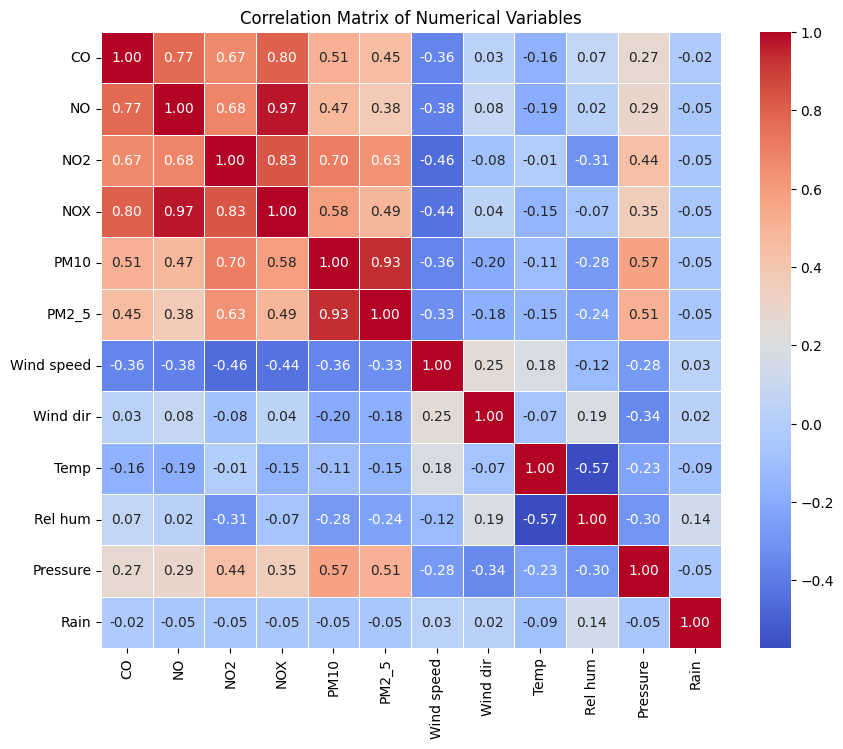

In [196]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numerical columns
corr_matrix_numerical = numerical_data.corr()

# Plotting the heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Part III: Choose appropriate methods to clean data (20%)

Justify the methods that you select. Show results after cleaning.


In [197]:
#Write your code here.
# Dropping duplicate rows
df = df.drop_duplicates()
df.shape

(3671, 15)

In [198]:
# Dropping null values for our target
df = df.dropna(subset=['PM2_5'])
df.shape

(3651, 15)

In [199]:
df.isna().sum()

CO            196
NO            174
NO2           174
NOX           173
PM10            1
PM2_5           0
Wind speed      1
Wind dir        1
Temp            3
Rel hum        14
Pressure        8
Rain           44
month           0
day             0
hour            0
dtype: int64

C:\Users\eraco\AppData\Local\Temp\ipykernel_20580\3695727524.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, x=df['CO'])
C:\Users\eraco\AppData\Local\Temp\ipykernel_20580\3695727524.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead,

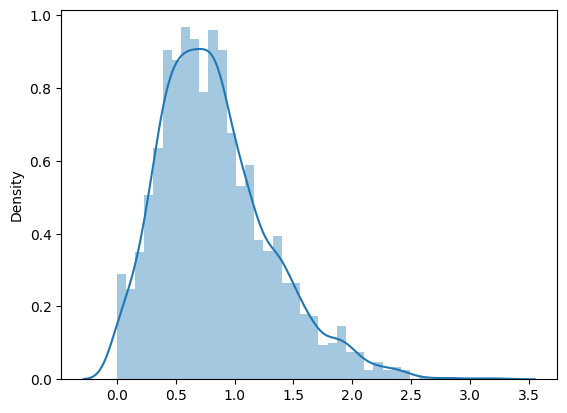

In [200]:
# Its a bit skewed distribution - which means changing with median is common
sns.distplot(df, x=df['CO'])

df.CO.fillna(df.CO.median(), inplace=True)

C:\Users\eraco\AppData\Local\Temp\ipykernel_20580\4157771747.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, x=df['NO'])
C:\Users\eraco\AppData\Local\Temp\ipykernel_20580\4157771747.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead,

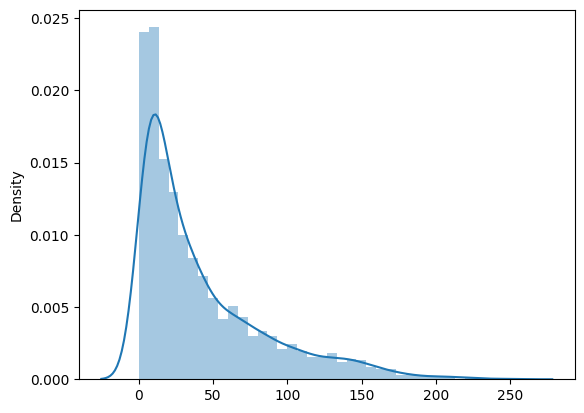

In [201]:
# Its a bit skewed distribution - which means changing with median is common
sns.distplot(df, x=df['NO'])

df.NO.fillna(df.NO.median(), inplace=True)

C:\Users\eraco\AppData\Local\Temp\ipykernel_20580\1483891968.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, x=df['NO2'])
C:\Users\eraco\AppData\Local\Temp\ipykernel_20580\1483891968.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead

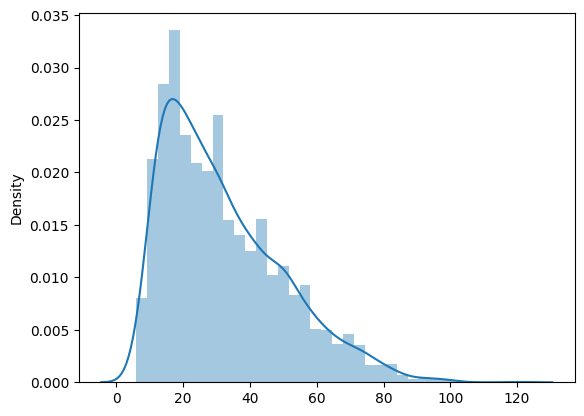

In [202]:
# Its a bit skewed distribution - which means changing with median is common
sns.distplot(df, x=df['NO2'])

df.NO2.fillna(df.NO2.median(), inplace=True)

C:\Users\eraco\AppData\Local\Temp\ipykernel_20580\3763168411.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, x=df['NOX'])
C:\Users\eraco\AppData\Local\Temp\ipykernel_20580\3763168411.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead

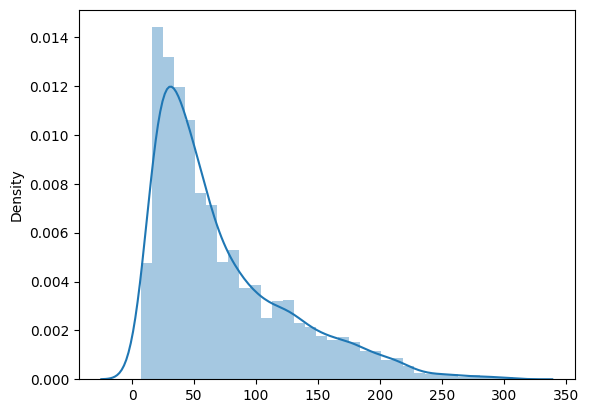

In [203]:
# Its a bit skewed distribution - which means changing with median is common
sns.distplot(df, x=df['NOX'])

df.NOX.fillna(df.NOX.median(), inplace=True)

C:\Users\eraco\AppData\Local\Temp\ipykernel_20580\4180906351.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, x=df['Rain'])
C:\Users\eraco\AppData\Local\Temp\ipykernel_20580\4180906351.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instea

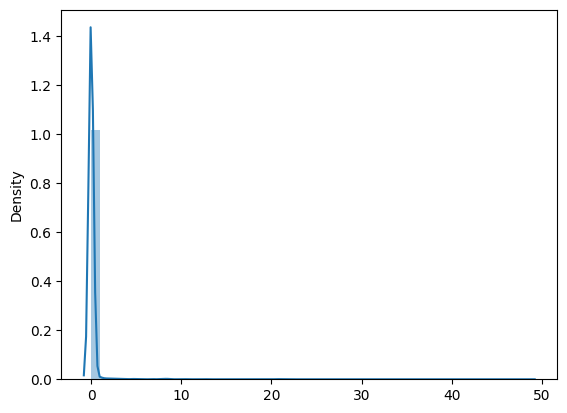

In [204]:
# Its a kinda normal - change with mean
sns.distplot(df, x=df['Rain'])

df.Rain.fillna(df.Rain.mean(), inplace=True)

In [205]:
# We han drop all remaining null values

df = df.dropna()

df.shape

(3628, 15)

In [206]:
df.isna().sum()

CO            0
NO            0
NO2           0
NOX           0
PM10          0
PM2_5         0
Wind speed    0
Wind dir      0
Temp          0
Rel hum       0
Pressure      0
Rain          0
month         0
day           0
hour          0
dtype: int64

## EDA

#### Part IV: Data analysis (20%)
Use appropriate methods to answer the following questions


1.   What factors contribute to the variations of PM2.5? (**Hint**: check other features that you have from your data (e.g. temperature, win, pressure or rain) and try to justify its impact based on the data.)
2.   How does the PM2.5 concentration fluctuate over a period of time? (Choose appropriate time duration).

Please justify all of your answers. Figures or tables are recommended to use for explanation.


In [207]:
#Write your code to answer questions

### Model part


#### Part V: Summary of your findings. (10%)

Write your answer here.